# Early Fusion: Model Interpretation

## Setup

In [1]:
import os
from glob import glob
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import pickle
import copy

### Paths

In [2]:
input_path = '../../../2_data_preprocessing/output/'

output_path = '../output/'

# Global configuration path
glob_conf_path = '../../../config/'

### Load global variables

In [3]:
exec(open(os.path.join(glob_conf_path, 'global_config_paper.py')).read())
exec(open(os.path.join(glob_conf_path, 'config_feature_contributions.py')).read())

## Model interpretation

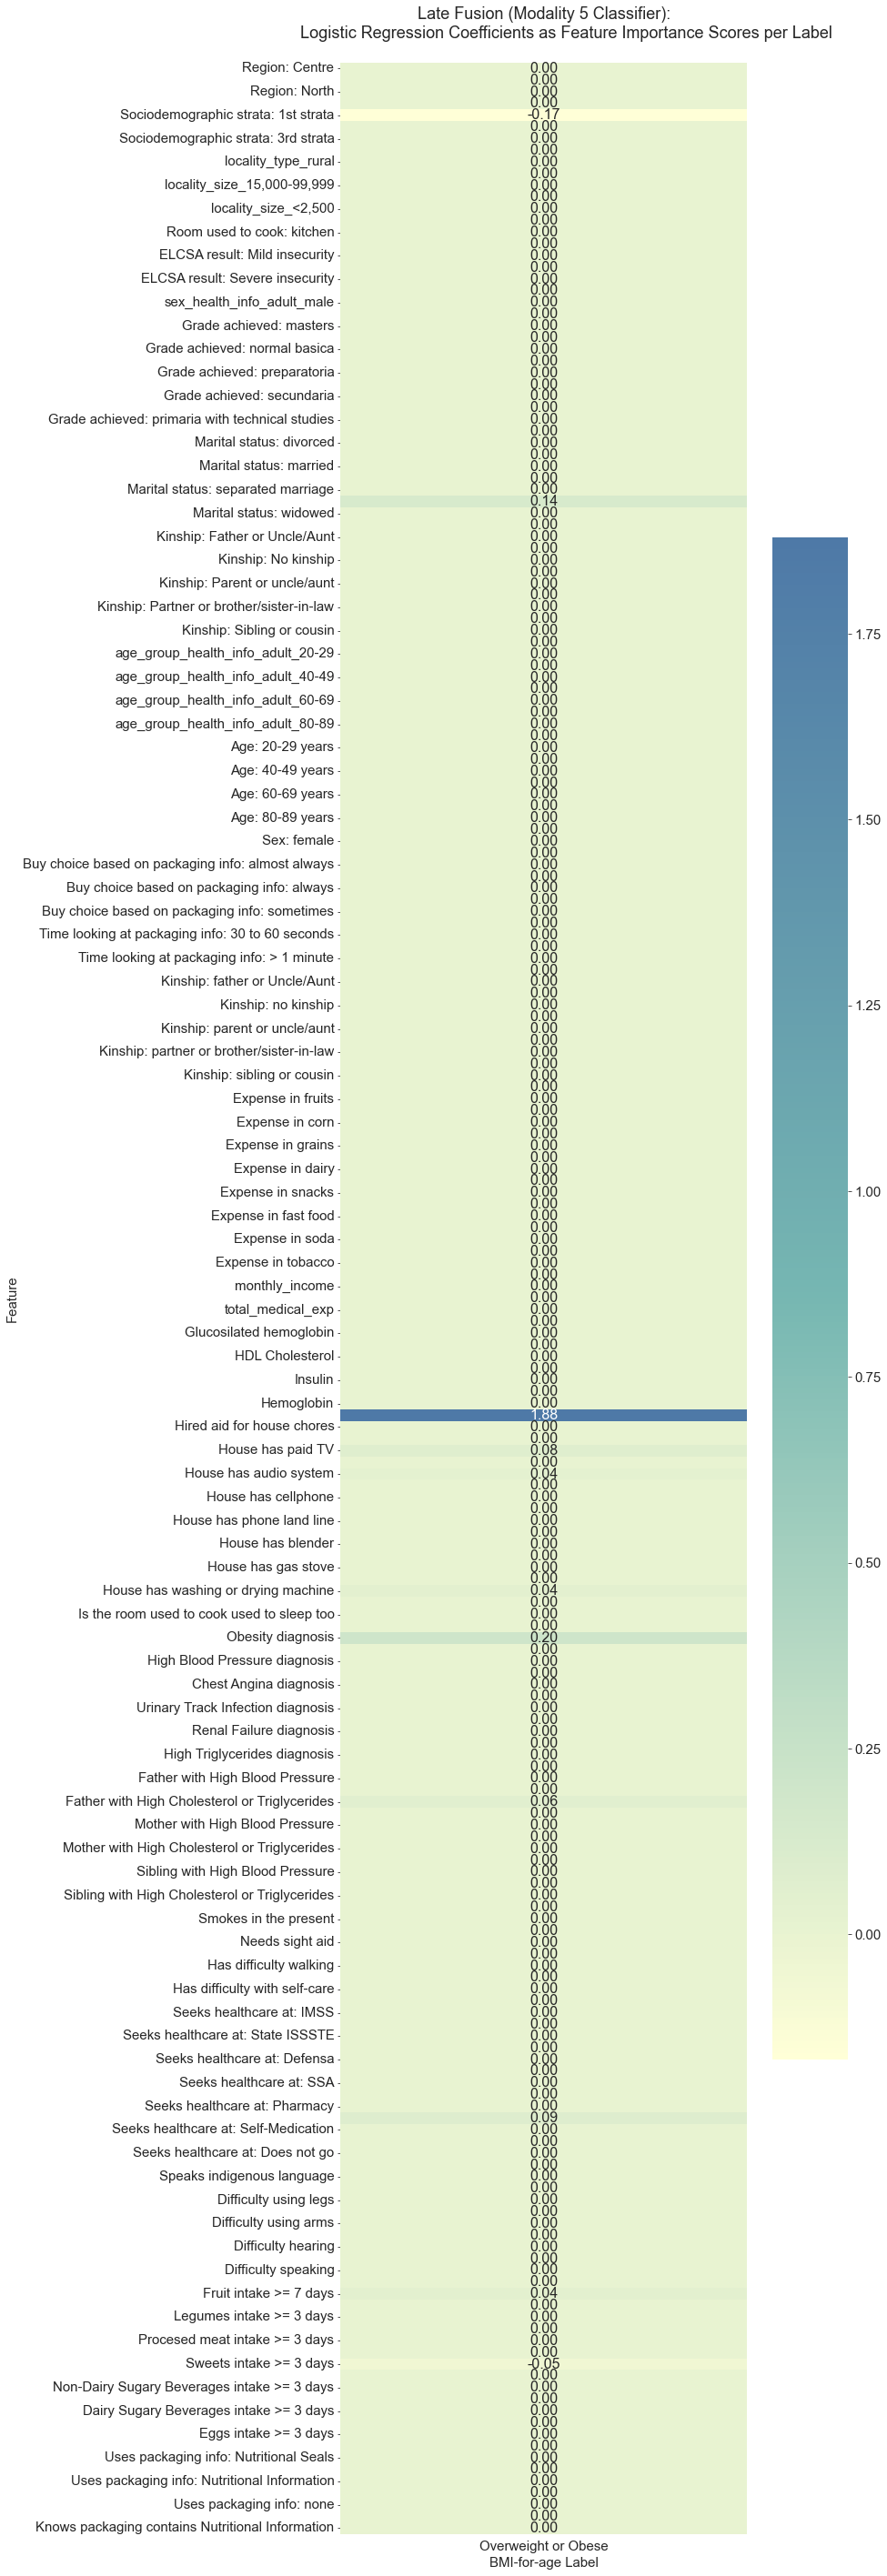

In [6]:
# Load data
train_unimodal_df = pd.read_csv(os.path.join(input_path, 'multimodal_norm_encoded.csv'))
feat = list(train_unimodal_df.drop(columns=['label','group']).columns)


# Load the model from disk
file_path = os.path.join(output_path,'models','pipeline_early_fusion_clf_elastic_net.sav')
clf = pickle.load(open(file_path, 'rb'))
coef_df = pd.DataFrame(clf.coef_, index=list(label_id_to_label_num_coef_int.keys()), columns=feat).T
#coef_df = coef_df.reindex(sorted(coef_df.columns), axis=1)
coef_df = coef_df.rename(var_name_to_feat_unimodal, axis=0)
#coef_df = coef_df.reindex(list(var_name_to_feat_m5.values())).dropna()
coef_df.to_csv(os.path.join(output_path,'others','tmp','m5_classifier_feature_contributions.csv'), index=True, header=True)


# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(10,50))
sns.heatmap(coef_df, annot=True, annot_kws={"size": 16}, fmt='.2f', cmap=conf_cmap)
plt.xlabel('BMI-for-age Label')
plt.ylabel('Feature')
plt.savefig(os.path.join(output_path,'others','report_early_fusion_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.title("""Late Fusion (Modality 5 Classifier):
          Logistic Regression Coefficients as Feature Importance Scores per Label
          """)
plt.savefig(os.path.join(output_path,'others','early_fusion_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})

In [13]:
coef_df_ordered = coef_df.sort_values(by="Overweight or Obese", axis=0, ascending=False)
coef_df_ordered.head(60)

,Overweight or Obese
Body Mass Index,1.880128
Obesity diagnosis,0.203426
Marital status: single,0.135524
Seeks healthcare at: Private care,0.087843
House has paid TV,0.079789
Father with High Cholesterol or Triglycerides,0.058183
House has washing or drying machine,0.043490
Fruit intake >= 7 days,0.040403
House has audio system,0.038604
Kidney stones diagnosis,0.000000


In [11]:
coef_df_ordered.tail(60)

,Overweight or Obese
sex_health_info_adult_male,0.000000
Grade achieved: bachellors,0.000000
Grade achieved: masters,0.000000
Grade achieved: none,0.000000
Grade achieved: normal basica,0.000000
age_group_health_info_adult_40-49,0.000000
age_group_health_info_adult_50-59,0.000000
age_group_health_info_adult_60-69,0.000000
Expense in grains,0.000000
Kinship: parent or uncle/aunt,0.000000


In [ ]:
clf.coef_

In [ ]:
# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(30,70))
sns.heatmap(coef_df, annot=True, annot_kws={"size": 11}, fmt='.2f', cmap=conf_cmap, cbar_kws={"aspect": 45})
plt.xlabel('Emotion ID')
plt.ylabel('Feature')
plt.savefig(os.path.join(output_path,'others','report_early_fusion_multimodal_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.title('Early Fusion (Multimodal Classifier): Logistic Regression Coefficients as Feature Importance Scores per Emotion')
plt.savefig(os.path.join(output_path,'others','early_fusion_multimodal_classifier_feature_contributions.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})

In [ ]:
coef_df

In [ ]:
data = coef_df.copy()
data_abs = data.abs()
top_features_per_emotion = {}
n = 10
for c in data.columns:
    top_features_per_emotion[c] = data_abs.nlargest(n, columns=c).index.tolist()

#all_features = set(data.index.tolist())
features_to_keep = set([item for sublist in top_features_per_emotion.values() for item in sublist])
#features_to_drop = all_features - features_to_keep

data_reduced = data.loc[features_to_keep].reindex(data.index).dropna()
data_reduced = data_reduced.reindex(feat_order_summary_multi)
mask = np.array([[feat not in top_features_per_emotion[c] for feat in data_reduced.index] for c in data_reduced.columns]).T
data_reduced.mask(mask).to_csv(os.path.join(output_path,'aus_egemaps','others','tmp','early_fusion_multimodal_classifier_feature_contributions_top_'+str(n)+'.csv'), index=True, header=True)


# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(18,40))
hm = sns.heatmap(data_reduced, annot=True, annot_kws={"size": 13}, fmt='.2f', cmap=conf_cmap, cbar_kws={"aspect": 45}, linewidth=0.25, mask=mask)
plt.xlabel('Emotion ID')
plt.ylabel('Feature')
ax = hm.axes
ax.set_facecolor((238/255, 238/255, 238/255))
plt.savefig(os.path.join(output_path,'aus_egemaps','others','report_early_fusion_multimodal_classifier_feature_contributions_top_'+str(n)+'.svg'), bbox_inches = 'tight')
plt.title('Early Fusion (Multimodal Classifier): Top ' + str(n) + ' Most Important Features per Emotion')
plt.savefig(os.path.join(output_path,'aus_egemaps','others','early_fusion_multimodal_classifier_feature_contributions_top_'+str(n)+'.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})

In [ ]:
data = coef_df.copy()
data_abs = data.abs()
top_features_per_emotion = {}
n = 5
for c in data.columns:
    top_features_per_emotion[c] = data_abs.nlargest(n, columns=c).index.tolist()

#all_features = set(data.index.tolist())
features_to_keep = set([item for sublist in top_features_per_emotion.values() for item in sublist])
#features_to_drop = all_features - features_to_keep

data_reduced = data.loc[features_to_keep].reindex(data.index).dropna()
mask = np.array([[feat not in top_features_per_emotion[c] for feat in data_reduced.index] for c in data_reduced.columns]).T
data_reduced.mask(mask).to_csv(os.path.join(output_path,'aus_egemaps','others','tmp','early_fusion_multimodal_classifier_feature_contributions_top_'+str(n)+'.csv'), index=True, header=True)

# Plot results
sns.set_style({'ytick.left': True})
plt.figure(figsize=(18,25))
hm = sns.heatmap(data_reduced, annot=True, annot_kws={"size": 13}, fmt='.2f', cmap=conf_cmap, cbar_kws={"aspect": 45}, linewidth=0.25, mask=mask)
plt.xlabel('Emotion ID')
plt.ylabel('Feature')
ax = hm.axes
ax.set_facecolor((238/255, 238/255, 238/255))
plt.savefig(os.path.join(output_path,'aus_egemaps','others','report_early_fusion_multimodal_classifier_feature_contributions_top_'+str(n)+'.svg'), bbox_inches = 'tight')
plt.title('Early Fusion (Multimodal Classifier): Top ' + str(n) + ' Most Important Features per Emotion')
plt.savefig(os.path.join(output_path,'aus_egemaps','others','early_fusion_multimodal_classifier_feature_contributions_top_'+str(n)+'.svg'), bbox_inches = 'tight')
plt.show()

sns.set_style({'ytick.left': False})